In [5]:
import os 
import numpy as np 
from locscale.include.emmer.ndimage.map_utils import load_map 

def plot_isosurface(array_3d, isosurface_level):
    """
    Plots the isosurface of a 3D array at a specified level using a blue color.

    Parameters:
    array_3d : numpy.ndarray
        The 3D array to extract the isosurface from.
    isosurface_level : float
        The level at which to extract the isosurface.
    """
    from skimage import measure
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D

    # Extract the mesh corresponding to the isosurface
    verts, faces, normals, values = measure.marching_cubes(array_3d, level=isosurface_level)

    # Plot the isosurface
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot the surface using the vertices and faces from marching_cubes with blue color
    ax.plot_trisurf(verts[:, 0], verts[:, 1], faces, verts[:, 2], color='blue', lw=1)

    ax.set_title(f'Isosurface at Level {isosurface_level}')
    plt.show()

# Test the function with a 3D array
x = np.linspace(-10, 10, 30)
y = np.linspace(-10, 10, 30)
z = np.linspace(-10, 10, 30)
X, Y, Z = np.meshgrid(x, y, z)

# Define a 3D array using a mathematical function (sphere-like shape)
values = np.sqrt(X**2 + Y**2 + Z**2)

# Call the function with an isosurface level of 7
def plot_isosurface(array_3d_original, isosurface_level):
    """
    Plots the isosurface of a 3D array at a specified level using a blue color.

    Parameters:
    array_3d : numpy.ndarray
        The 3D array to extract the isosurface from.
    isosurface_level : float
        The level at which to extract the isosurface.
    """
    from skimage import measure
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D

    # Extract the mesh corresponding to the isosurface
    array_3d = np.copy(array_3d_original)
    verts, faces, normals, values = measure.marching_cubes(array_3d, level=isosurface_level)

    # Plot the isosurface
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot the surface using the vertices and faces from marching_cubes with blue color
    ax.plot_trisurf(verts[:, 0], verts[:, 1], faces, verts[:, 2], color='blue', lw=1)

    ax.set_title(f'Isosurface at Level {isosurface_level}')
    plt.show()

# Test the function with a 3D array
x = np.linspace(-10, 10, 30)
y = np.linspace(-10, 10, 30)
z = np.linspace(-10, 10, 30)
X, Y, Z = np.meshgrid(x, y, z)

# Define a 3D array using a mathematical function (sphere-like shape)
values = np.sqrt(X**2 + Y**2 + Z**2)

# Call the function with an isosurface level of 7
plot_isosurface(values, 7)



In [9]:
emmap, apix = load_map("/home/abharadwaj1/papers/elife_paper/figure_information/data/maps/emd_0665/EMD_665_unsharpened_fullmap.mrc")
print(emmap.shape)

print(emmap.min(), emmap.max())

(200, 200, 200)
-0.3166792 1.2325995


In [31]:
def plot_isosurface(array_3d, isosurface_level, downsample_factor=2, elev=30, azim=45, axis_limit=50):
    """
    Plots the isosurface of a 3D array at a specified level using a blue color.
    Optionally downsample the 3D array, set custom view angles, and define axis limits.

    Parameters:
    array_3d : numpy.ndarray
        The 3D array to extract the isosurface from.
    isosurface_level : float
        The level at which to extract the isosurface.
    downsample_factor : int, optional
        The factor by which to downsample the 3D array for efficient plotting.
    elev : int, optional
        The elevation angle in degrees for the plot view (default is 30).
    azim : int, optional
        The azimuth angle in degrees for the plot view (default is 45).
    axis_limit : int, optional
        The limit for the x, y, and z axis (default is 50).
    """
    from skimage import measure
    from scipy.ndimage import zoom
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D

    # Downsample the array if it's large
    if downsample_factor > 1:
        array_3d = zoom(array_3d, zoom=1/downsample_factor)
    
    # Extract the mesh corresponding to the isosurface
    verts, faces, normals, values = measure.marching_cubes(array_3d, level=isosurface_level)

    # Plot the isosurface
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')

    # show only axis but not grid
    ax.axis('off')
    

    # Plot the surface using the vertices and faces from marching_cubes with blue color
    ax.plot_trisurf(verts[:, 0], verts[:, 1], faces, verts[:, 2], color='blue', lw=1)

    # Set the custom view angle
    ax.view_init(elev=elev, azim=azim)

    # Set the axis limits for x, y, and z
    ax.set_xlim(0, axis_limit)
    ax.set_ylim(0, axis_limit)
    ax.set_zlim(0, axis_limit)

    ax.set_title(f'Isosurface at Level {isosurface_level} (Downsampled by {downsample_factor}x)')
    plt.show()

# Plot with downsampling, custom view angle, and axis limit of 50


In [35]:

def plot_isosurfaces_side_by_side(array_1, level_1, array_2, level_2, downsample_factor=2, elev=30, azim=45, axis_limit=50):
    """
    Plots two isosurfaces side-by-side in two subplots using specified levels.
    Optionally downsample the 3D arrays, set custom view angles, and define axis limits.

    Parameters:
    array_1 : numpy.ndarray
        The first 3D array to extract the isosurface from.
    level_1 : float
        The level at which to extract the isosurface for array_1.
    array_2 : numpy.ndarray
        The second 3D array to extract the isosurface from.
    level_2 : float
        The level at which to extract the isosurface for array_2.
    downsample_factor : int, optional
        The factor by which to downsample the 3D arrays for efficient plotting.
    elev : int, optional
        The elevation angle in degrees for the plot view (default is 30).
    azim : int, optional
        The azimuth angle in degrees for the plot view (default is 45).
    axis_limit : int, optional
        The limit for the x, y, and z axis (default is 50).
    """
    from skimage import measure
    from scipy.ndimage import zoom
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D
    
    # Downsample the arrays if they are large
    if downsample_factor > 1:
        array_1 = zoom(array_1, zoom=1/downsample_factor)
        array_2 = zoom(array_2, zoom=1/downsample_factor)

    # Create a figure with two subplots
    fig = plt.figure(figsize=(16, 8))
    
    # Extract the mesh corresponding to the isosurface for the first array
    verts_1, faces_1, normals_1, values_1 = measure.marching_cubes(array_1, level=level_1)

    # Subplot 1: Isosurface for array_1
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.plot_trisurf(verts_1[:, 0], verts_1[:, 1], faces_1, verts_1[:, 2], color='blue', lw=1)
    ax1.view_init(elev=elev, azim=azim)
    ax1.set_xlim(0, axis_limit)
    ax1.set_ylim(0, axis_limit)
    ax1.set_zlim(0, axis_limit)
    ax1.set_title(f'Isosurface of Array 1 at Level {level_1}')

    # Extract the mesh corresponding to the isosurface for the second array
    verts_2, faces_2, normals_2, values_2 = measure.marching_cubes(array_2, level=level_2)

    # Subplot 2: Isosurface for array_2
    ax2 = fig.add_subplot(122, projection='3d')
    ax2.plot_trisurf(verts_2[:, 0], verts_2[:, 1], faces_2, verts_2[:, 2], color='red', lw=1)
    ax2.view_init(elev=elev, azim=azim)
    ax2.set_xlim(0, axis_limit)
    ax2.set_ylim(0, axis_limit)
    ax2.set_zlim(0, axis_limit)
    ax2.set_title(f'Isosurface of Array 2 at Level {level_2}')
    
    # return the figure object for saving or further processing.
    return fig

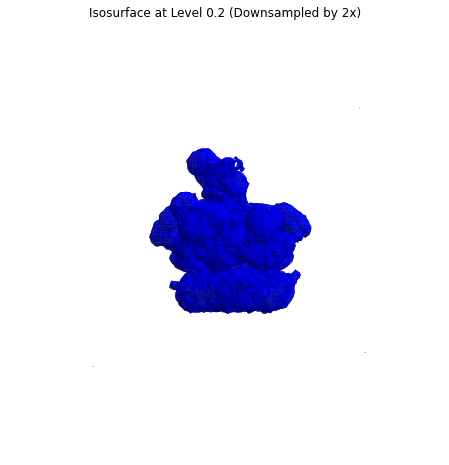

In [32]:
plot_isosurface(emmap, isosurface_level=0.2, downsample_factor=2, elev=270, azim=0, axis_limit=100)


In [36]:
primary_emmap, apix_p = load_map("/home/abharadwaj1/papers/elife_paper/figure_information/data/compute_cii/EMD-0665/emd_0665.map")
threshold = 0.6

# Plot the isosurface of the primary map and emmap side by side
fig = plot_isosurfaces_side_by_side(primary_emmap, 0.46, emmap, 0.4, downsample_factor=2, elev=270, azim=0, axis_limit=100)

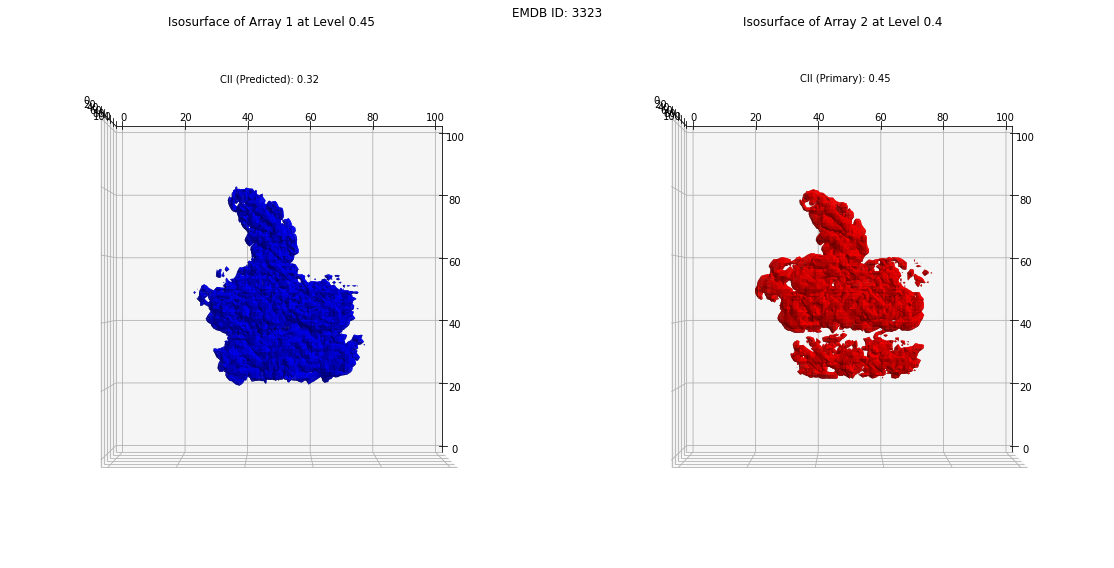

In [43]:

fig = plot_isosurfaces_side_by_side(
            primary_emmap, level_1=0.45, 
            array_2=emmap, level_2=0.4, 
            downsample_factor=2, elev=270, azim=0, axis_limit=emmap.shape[0]//2)
        
        # Save the plot
# Add super title
fig.suptitle(f"EMDB ID: 3323")
# Add CII predicted and primary to the subplot title
fig.text(0.25, 0.85, f"CII (Predicted): 0.32", ha='center')
fig.text(0.75, 0.85, f"CII (Primary): 0.45", ha='center')
fig.tight_layout()    

In [44]:
csv_path = "/home/abharadwaj1/papers/elife_paper/figure_information/scripts/EMDB_search_results_subtomogram_averaging.csv"

import pandas as pd

df_emdb = pd.read_csv(csv_path)
df_emdb

emdb_id
0   EMD-19999
1   EMD-41485
2   EMD-17316
3   EMD-39112
4   EMD-39109
5   EMD-39107
6   EMD-37727
7   EMD-16489
8   EMD-16492
9   EMD-16487
10  EMD-19410
11  EMD-40224
12  EMD-40223
13  EMD-35229
14  EMD-17932
15  EMD-17930
16  EMD-17942
17  EMD-17935
18  EMD-17933
19  EMD-17931
20  EMD-17934
21  EMD-17929
22  EMD-17936
23  EMD-16772
24  EMD-16774
25  EMD-16511
26  EMD-16183
27  EMD-15949
28  EMD-14399
29  EMD-14590
30  EMD-14589
31  EMD-14623
32  EMD-14617
33  EMD-14592

In [50]:
df_dict = df_emdb.to_dict()
df_dict
list_of_emdb_id = [x.split("-")[1] for x in df_dict["emdb_id"].values()]
list_of_emdb_id

# dump as json 
import json
with open("emdb_id_STA.json", "w") as f:
    json.dump(list_of_emdb_id, f)

In [42]:
# Add super title
fig.suptitle(f"EMDB ID: 3323")
# Add CII predicted and primary to the subplot title
fig.text(0.25, 0.85, f"CII (Predicted): 0.32", ha='center')
fig.text(0.75, 0.85, f"CII (Primary): 0.45", ha='center')
fig.tight_layout()  
fig.show()  

/home/abharadwaj1/miniconda3/envs/locscale_dev/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys
